# Project 1: Linear Regression from First Principles

## Goal
Understand gradient descent, loss functions, and parameter updates at the most basic level.

## Learning Objectives
- Understand what a loss function is and why MSE
- How gradient descent works mathematically
- What is a learning rate and how it affects convergence
- What does an epoch mean
- How to know when to stop training

## Date Started
November 8, 2025

---
## Part 1: Theoretical Foundation

### Linear Regression Model
The linear regression model predicts output $y$ from input $x$ using:

$$\hat{y} = w \cdot x + b$$

Where:
- $w$ = weight (slope)
- $b$ = bias (intercept)
- $\hat{y}$ = predicted value

### Loss Function: Mean Squared Error (MSE)
We measure how well our model fits the data using MSE:

$$L = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Why MSE?** It penalizes larger errors more heavily and is differentiable.

### Gradient Descent
To minimize the loss, we update parameters in the direction that reduces loss:

$$w := w - \alpha \frac{\partial L}{\partial w}$$
$$b := b - \alpha \frac{\partial L}{\partial b}$$

Where:
- $\alpha$ = learning rate (step size)
- $\frac{\partial L}{\partial w}$ = gradient of loss with respect to weight

### Gradients for Linear Regression
$$\frac{\partial L}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} x_i(y_i - \hat{y}_i)$$
$$\frac{\partial L}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)$$

---
## Part 2: Setup and Data Generation

In [ ]:
# Import libraries and project utilities without hard-coded paths
import sys
from pathlib import Path

def add_repo_root(marker_files=("requirements.txt","README.md",".git")):
    p = Path.cwd().resolve()
    for candidate in [p] + list(p.parents):
        if any((candidate / m).exists() for m in marker_files):
            if str(candidate) not in sys.path:
                sys.path.insert(0, str(candidate))
            return candidate
    return None

REPO_ROOT = add_repo_root()
print(f"Detected repo root: {REPO_ROOT}")

import numpy as np
from utils.data_generators import generate_linear_data
from utils.visualization import plot_loss_curve, plot_regression_line

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!
NumPy version: 2.3.4


In [2]:
# Generate synthetic data
# True relationship: y = 4 + 3x + noise

TRUE_SLOPE = 3.0
TRUE_INTERCEPT = 4.0
N_SAMPLES = 100
NOISE_STD = 1.0

X, y = generate_linear_data(
    n_samples=N_SAMPLES,
    slope=TRUE_SLOPE,
    intercept=TRUE_INTERCEPT,
    noise_std=NOISE_STD,
    random_state=42
)

print(f"Generated {N_SAMPLES} data points")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nTrue parameters:")
print(f"  Slope (w): {TRUE_SLOPE}")
print(f"  Intercept (b): {TRUE_INTERCEPT}")

Generated 100 data points
X shape: (100, 1)
y shape: (100, 1)

True parameters:
  Slope (w): 3.0
  Intercept (b): 4.0


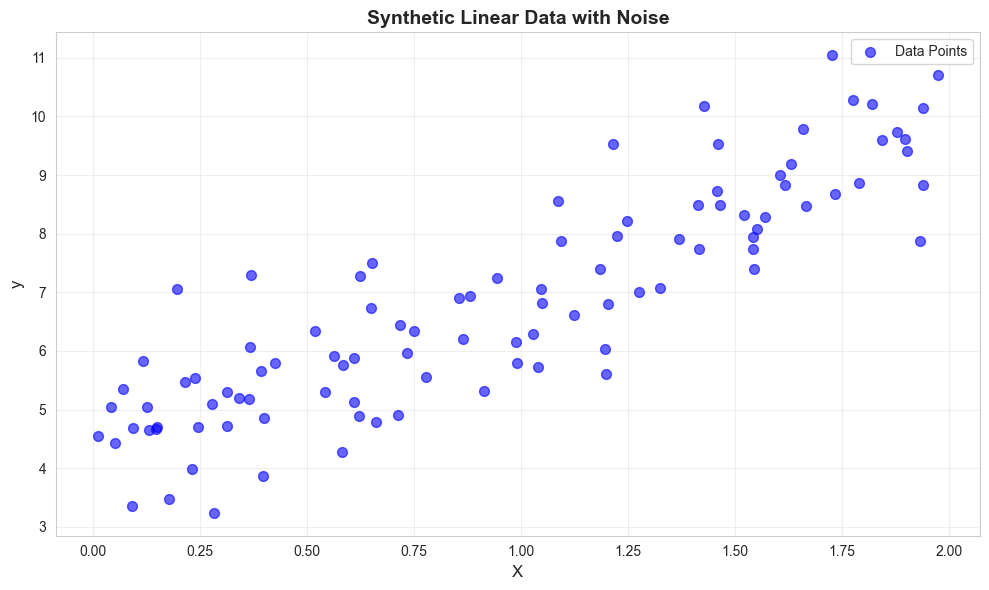


Data Statistics:
X - Mean: 0.94, Std: 0.59, Range: [0.01, 1.97]
y - Mean: 6.82, Std: 1.87, Range: [3.24, 11.04]


In [3]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, s=50, color='blue', label='Data Points')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Synthetic Linear Data with Noise', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("\nData Statistics:")
print(f"X - Mean: {X.mean():.2f}, Std: {X.std():.2f}, Range: [{X.min():.2f}, {X.max():.2f}]")
print(f"y - Mean: {y.mean():.2f}, Std: {y.std():.2f}, Range: [{y.min():.2f}, {y.max():.2f}]")

---
## Part 3: Implement Linear Regression from Scratch

In [4]:
class LinearRegressionFromScratch:
    """
    Linear Regression implemented from first principles using gradient descent
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Initialize the model
        
        Args:
            learning_rate: Step size for gradient descent
            n_iterations: Number of training iterations
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weight = None
        self.bias = None
        self.loss_history = []
        self.weight_history = []
        self.bias_history = []
    
    def _compute_loss(self, y_true, y_pred):
        """
        Compute Mean Squared Error loss
        
        Args:
            y_true: True values
            y_pred: Predicted values
        
        Returns:
            MSE loss value
        """
        n = len(y_true)
        loss = (1 / n) * np.sum((y_true - y_pred) ** 2)
        return loss
    
    def _compute_gradients(self, X, y_true, y_pred):
        """
        Compute gradients of loss with respect to weight and bias
        
        Args:
            X: Input features
            y_true: True values
            y_pred: Predicted values
        
        Returns:
            dw: Gradient with respect to weight
            db: Gradient with respect to bias
        """
        n = len(y_true)
        
        # Compute gradients
        error = y_true - y_pred
        dw = -(2 / n) * np.sum(X * error)
        db = -(2 / n) * np.sum(error)
        
        return dw, db
    
    def predict(self, X):
        """
        Make predictions using current parameters
        
        Args:
            X: Input features
        
        Returns:
            Predictions
        """
        return self.weight * X + self.bias
    
    def fit(self, X, y, verbose=True):
        """
        Train the model using gradient descent
        
        Args:
            X: Training features
            y: Training targets
            verbose: Whether to print progress
        """
        n_samples = X.shape[0]
        
        # Initialize parameters randomly
        self.weight = np.random.randn()
        self.bias = np.random.randn()
        
        if verbose:
            print(f"Initial parameters: w={self.weight:.4f}, b={self.bias:.4f}")
        
        # Gradient descent loop
        for iteration in range(self.n_iterations):
            # Forward pass: compute predictions
            y_pred = self.predict(X)
            
            # Compute loss
            loss = self._compute_loss(y, y_pred)
            self.loss_history.append(loss)
            
            # Compute gradients
            dw, db = self._compute_gradients(X, y, y_pred)
            
            # Update parameters
            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Store parameter history
            self.weight_history.append(self.weight)
            self.bias_history.append(self.bias)
            
            # Print progress
            if verbose and (iteration % 100 == 0 or iteration == self.n_iterations - 1):
                print(f"Iteration {iteration:4d}: Loss={loss:.4f}, w={self.weight:.4f}, b={self.bias:.4f}")
        
        if verbose:
            print(f"\nTraining complete!")
            print(f"Final parameters: w={self.weight:.4f}, b={self.bias:.4f}")

print("LinearRegressionFromScratch class defined!")

LinearRegressionFromScratch class defined!


---
## Part 4: Train the Model

In [5]:
# Create and train the model
LEARNING_RATE = 0.1
N_ITERATIONS = 1000

model = LinearRegressionFromScratch(
    learning_rate=LEARNING_RATE,
    n_iterations=N_ITERATIONS
)

print(f"Training Linear Regression with:")
print(f"  Learning Rate: {LEARNING_RATE}")
print(f"  Iterations: {N_ITERATIONS}")
print(f"\n{'='*60}\n")

model.fit(X, y, verbose=True)

Training Linear Regression with:
  Learning Rate: 0.1
  Iterations: 1000


Initial parameters: w=0.0130, b=1.4535
Iteration    0: Loss=32.1386, w=1.2132, b=2.5244
Iteration  100: Loss=0.8066, w=2.7751, b=4.2095
Iteration  200: Loss=0.8066, w=2.7703, b=4.2149
Iteration  300: Loss=0.8066, w=2.7701, b=4.2151
Iteration  400: Loss=0.8066, w=2.7701, b=4.2151
Iteration  500: Loss=0.8066, w=2.7701, b=4.2151
Iteration  600: Loss=0.8066, w=2.7701, b=4.2151
Iteration  700: Loss=0.8066, w=2.7701, b=4.2151
Iteration  800: Loss=0.8066, w=2.7701, b=4.2151
Iteration  900: Loss=0.8066, w=2.7701, b=4.2151
Iteration  999: Loss=0.8066, w=2.7701, b=4.2151

Training complete!
Final parameters: w=2.7701, b=4.2151


In [6]:
# Compare learned parameters with true parameters
print("\n" + "="*60)
print("PARAMETER COMPARISON")
print("="*60)
print(f"\nSlope (weight):")
print(f"  True value:    {TRUE_SLOPE:.4f}")
print(f"  Learned value: {model.weight:.4f}")
print(f"  Error:         {abs(TRUE_SLOPE - model.weight):.4f}")

print(f"\nIntercept (bias):")
print(f"  True value:    {TRUE_INTERCEPT:.4f}")
print(f"  Learned value: {model.bias:.4f}")
print(f"  Error:         {abs(TRUE_INTERCEPT - model.bias):.4f}")

# Calculate final loss
final_predictions = model.predict(X)
final_loss = model._compute_loss(y, final_predictions)
print(f"\nFinal Loss (MSE): {final_loss:.4f}")


PARAMETER COMPARISON

Slope (weight):
  True value:    3.0000
  Learned value: 2.7701
  Error:         0.2299

Intercept (bias):
  True value:    4.0000
  Learned value: 4.2151
  Error:         0.2151

Final Loss (MSE): 0.8066


---
## Part 5: Visualize Training Process

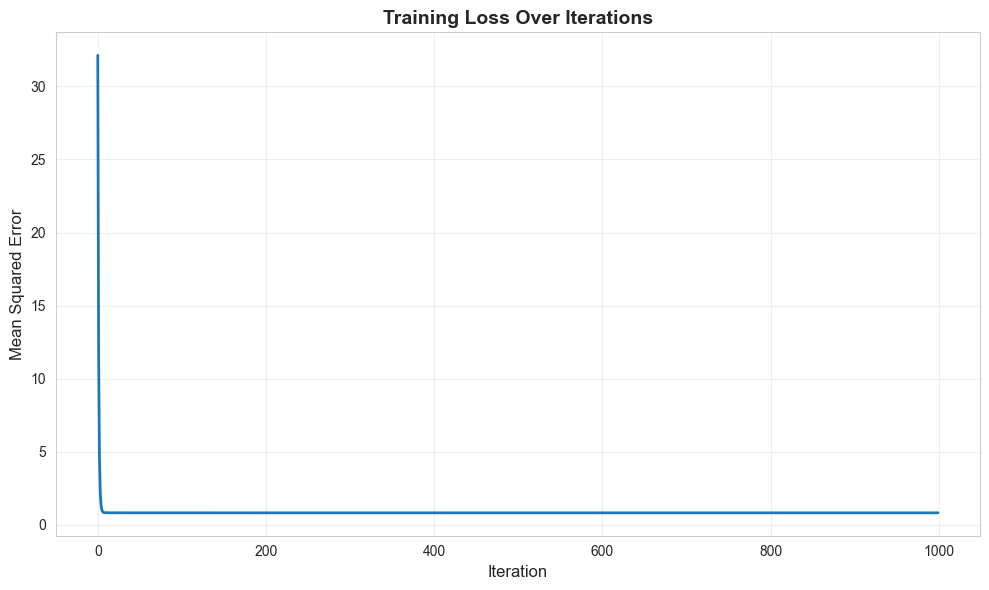

Initial Loss: 32.1386
Final Loss: 0.8066
Loss Reduction: 97.49%


In [7]:
# Plot loss curve
plot_loss_curve(
    model.loss_history,
    title="Training Loss Over Iterations",
    xlabel="Iteration",
    ylabel="Mean Squared Error"
)

print(f"Initial Loss: {model.loss_history[0]:.4f}")
print(f"Final Loss: {model.loss_history[-1]:.4f}")
print(f"Loss Reduction: {(1 - model.loss_history[-1]/model.loss_history[0]) * 100:.2f}%")

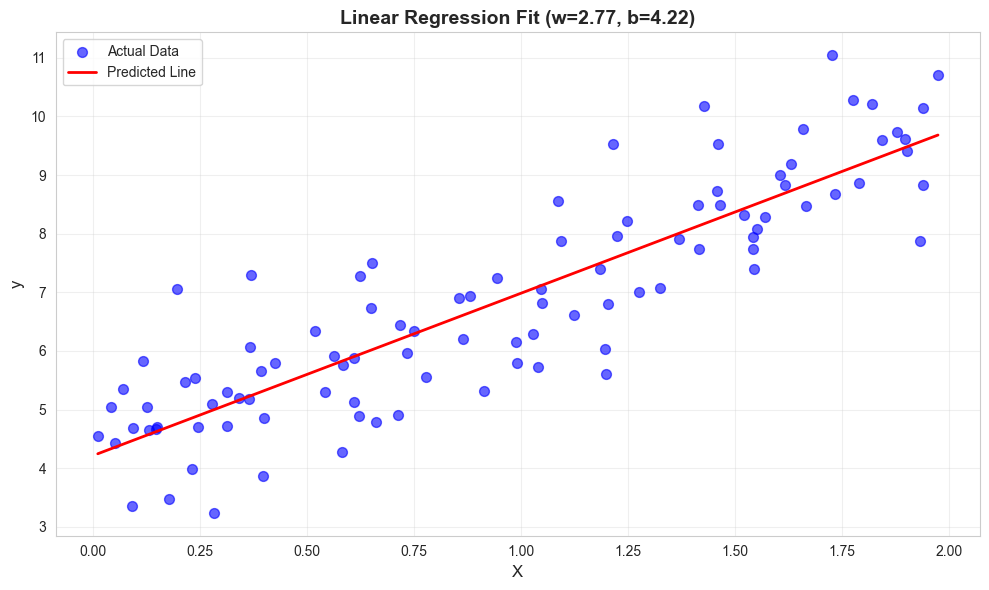

In [8]:
# Plot learned regression line
predictions = model.predict(X)

plot_regression_line(
    X, y, predictions,
    title=f"Linear Regression Fit (w={model.weight:.2f}, b={model.bias:.2f})"
)

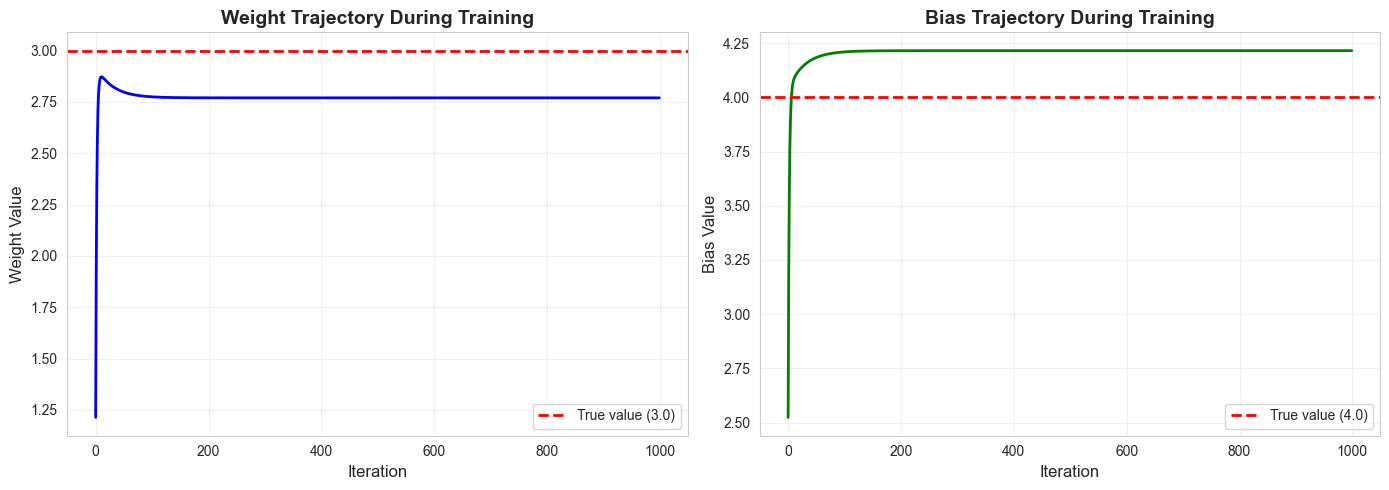

Observe how the parameters converge to their true values!


In [9]:
# Plot parameter trajectory (how parameters changed during training)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Weight trajectory
ax1.plot(model.weight_history, linewidth=2, color='blue')
ax1.axhline(y=TRUE_SLOPE, color='red', linestyle='--', linewidth=2, label=f'True value ({TRUE_SLOPE})')
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Weight Value', fontsize=12)
ax1.set_title('Weight Trajectory During Training', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Bias trajectory
ax2.plot(model.bias_history, linewidth=2, color='green')
ax2.axhline(y=TRUE_INTERCEPT, color='red', linestyle='--', linewidth=2, label=f'True value ({TRUE_INTERCEPT})')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Bias Value', fontsize=12)
ax2.set_title('Bias Trajectory During Training', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("Observe how the parameters converge to their true values!")

---
## Part 6: Experiment with Different Learning Rates

**Key Question:** How does the learning rate affect convergence?

In [10]:
# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
models = {}

print("Training models with different learning rates...\n")

for lr in learning_rates:
    print(f"Learning Rate: {lr}")
    print("-" * 40)
    
    model_temp = LinearRegressionFromScratch(
        learning_rate=lr,
        n_iterations=1000
    )
    model_temp.fit(X, y, verbose=False)
    
    models[lr] = model_temp
    
    print(f"  Final Loss: {model_temp.loss_history[-1]:.4f}")
    print(f"  Final w: {model_temp.weight:.4f}")
    print(f"  Final b: {model_temp.bias:.4f}")
    print()

Training models with different learning rates...

Learning Rate: 0.001
----------------------------------------
  Final Loss: 0.8801
  Final w: 2.3125
  Final b: 4.6547

Learning Rate: 0.01
----------------------------------------
  Final Loss: 0.8077
  Final w: 2.8227
  Final b: 4.1555

Learning Rate: 0.1
----------------------------------------
  Final Loss: 0.8066
  Final w: 2.7701
  Final b: 4.2151

Learning Rate: 0.5
----------------------------------------
  Final Loss: 199578514729707831669975078140107120111759014812757000192.0000
  Final w: -7848641300710935653284577280.0000
  Final b: -6929923656926370942062428160.0000



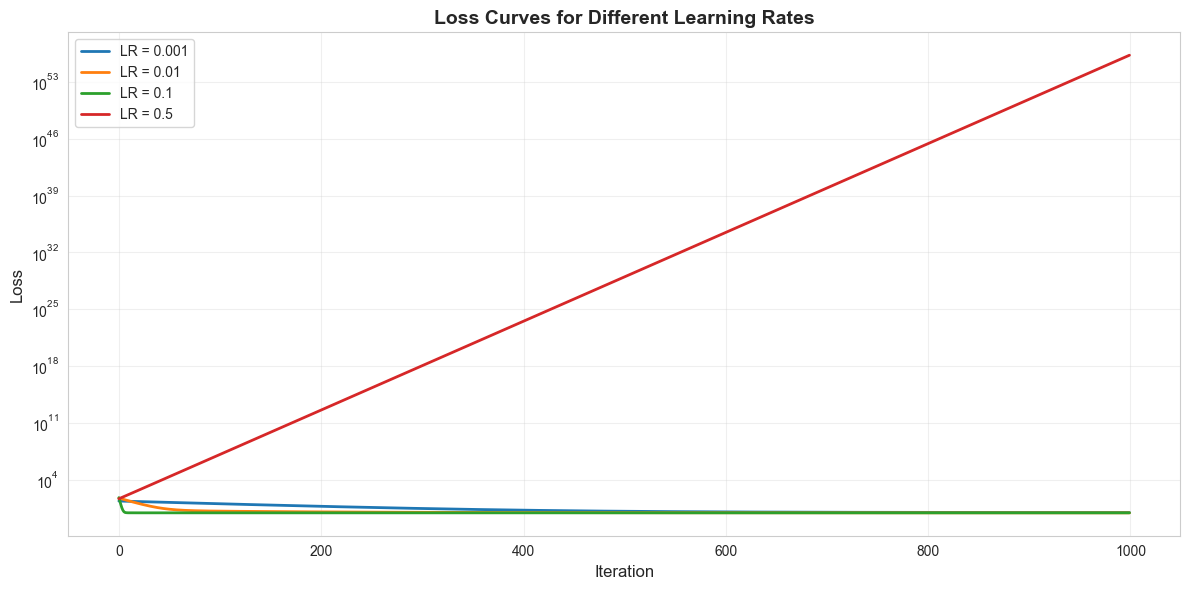

In [11]:
# Compare loss curves for different learning rates
from utils.visualization import plot_learning_rate_comparison

losses_dict = {lr: model.loss_history for lr, model in models.items()}

plot_learning_rate_comparison(learning_rates, losses_dict)

In [12]:
# Detailed comparison
print("\n" + "="*70)
print("LEARNING RATE EFFECTS ANALYSIS")
print("="*70)

for lr in learning_rates:
    model_temp = models[lr]
    initial_loss = model_temp.loss_history[0]
    final_loss = model_temp.loss_history[-1]
    
    print(f"\nLearning Rate: {lr}")
    print(f"  Initial Loss:    {initial_loss:.4f}")
    print(f"  Final Loss:      {final_loss:.4f}")
    print(f"  Loss Reduction:  {(1 - final_loss/initial_loss) * 100:.2f}%")
    print(f"  Weight Error:    {abs(TRUE_SLOPE - model_temp.weight):.4f}")
    print(f"  Bias Error:      {abs(TRUE_INTERCEPT - model_temp.bias):.4f}")
    
    # Check convergence
    if len(model_temp.loss_history) > 100:
        last_100_change = abs(model_temp.loss_history[-1] - model_temp.loss_history[-100])
        if last_100_change < 0.001:
            print(f"  Status: ✓ Converged")
        else:
            print(f"  Status: ⚠ Still changing (Δ={last_100_change:.4f})")


LEARNING RATE EFFECTS ANALYSIS

Learning Rate: 0.001
  Initial Loss:    22.9455
  Final Loss:      0.8801
  Loss Reduction:  96.16%
  Weight Error:    0.6875
  Bias Error:      0.6547
  Status: ⚠ Still changing (Δ=0.0119)

Learning Rate: 0.01
  Initial Loss:    52.6694
  Final Loss:      0.8077
  Loss Reduction:  98.47%
  Weight Error:    0.1773
  Bias Error:      0.1555
  Status: ⚠ Still changing (Δ=0.0010)

Learning Rate: 0.1
  Initial Loss:    59.9196
  Final Loss:      0.8066
  Loss Reduction:  98.65%
  Weight Error:    0.2299
  Bias Error:      0.2151
  Status: ✓ Converged

Learning Rate: 0.5
  Initial Loss:    43.8408
  Final Loss:      199578514729707831669975078140107120111759014812757000192.0000
  Loss Reduction:  -455234173115250354241900342643638342352369867220278312960.00%
  Weight Error:    7848641300710935653284577280.0000
  Bias Error:      6929923656926370942062428160.0000
  Status: ⚠ Still changing (Δ=199577751487279180613264028430360099385348462263385718784.0000)


---
## Part 7: Compare with sklearn Implementation

In [13]:
# Compare with sklearn's LinearRegression
from sklearn.linear_model import LinearRegression as SklearnLR

sklearn_model = SklearnLR()
sklearn_model.fit(X, y)

print("\n" + "="*70)
print("COMPARISON: Our Implementation vs sklearn")
print("="*70)

print(f"\nSlope (weight):")
print(f"  Our model:     {model.weight:.6f}")
print(f"  sklearn:       {sklearn_model.coef_[0][0]:.6f}")
print(f"  Difference:    {abs(model.weight - sklearn_model.coef_[0][0]):.6f}")

print(f"\nIntercept (bias):")
print(f"  Our model:     {model.bias:.6f}")
print(f"  sklearn:       {sklearn_model.intercept_[0]:.6f}")
print(f"  Difference:    {abs(model.bias - sklearn_model.intercept_[0]):.6f}")

# Compare predictions
our_predictions = model.predict(X)
sklearn_predictions = sklearn_model.predict(X)

prediction_diff = np.mean(np.abs(our_predictions - sklearn_predictions))
print(f"\nMean Absolute Difference in Predictions: {prediction_diff:.6f}")

if prediction_diff < 0.01:
    print("\n✓ Our implementation matches sklearn very closely!")
else:
    print("\n⚠ Some difference exists (this is normal due to different optimization methods)")


COMPARISON: Our Implementation vs sklearn

Slope (weight):
  Our model:     2.770113
  sklearn:       2.770113
  Difference:    0.000000

Intercept (bias):
  Our model:     4.215096
  sklearn:       4.215096
  Difference:    0.000000

Mean Absolute Difference in Predictions: 0.000000

✓ Our implementation matches sklearn very closely!


---
## Part 8: Key Learnings and Reflections

### What I Learned

1. **Loss Function (MSE)**
   - Measures prediction error
   - Differentiable (needed for gradient descent)
   - Penalizes large errors more

2. **Gradient Descent**
   - Iteratively updates parameters
   - Moves in direction of steepest descent
   - Requires tuning learning rate

3. **Learning Rate Effects**
   - Too small: slow convergence
   - Too large: oscillation or divergence
   - Sweet spot: steady decrease in loss

4. **Convergence**
   - Loss plateaus when parameters are near optimal
   - Can monitor gradient magnitude
   - Early stopping possible

### Connections to Future Projects

- **Same gradient descent** will be used in neural networks and transformers
- **Same loss monitoring** applies to all ML training
- **Learning rate tuning** is critical in deep learning
- **Parameter updates** are the core of all optimization

---
## Part 9: Next Steps

### Experiments to Try
- [ ] Add more features (multi-dimensional regression)
- [ ] Implement mini-batch gradient descent
- [ ] Add momentum to gradient descent
- [ ] Try adaptive learning rates
- [ ] Test on real datasets

### Move to Project 2
Next: **Binary Classification with Logistic Regression**
- Different loss function (cross-entropy)
- Sigmoid activation
- Classification metrics